# Decimal precision of Float16

In [1]:
using PyPlot, StatsBase, Statistics

In [35]:
decimal_precision(x,y) = -log10(abs(log10(x/y)))

decimal_precision (generic function with 1 method)

In [48]:
2^8

256

In [50]:
float16s = vcat(nextfloat(Float16(0)),                                   # minpos
                reinterpret.(Float16,UInt16.(1:30) .<< 10),              # powers of two
                reinterpret.(Float16,(UInt16.(0:30) .<< 10) .| 0x03ff))  # just smaller than powers of two
sort!(float16s)
float16s[end] = prevfloat(float16s[end]);   # otherwise the wcdp calculation involves Inf

float32s = vcat(nextfloat(Float32(0)),                                   # minpos
                reinterpret.(Float32,UInt32.(1:254) .<< 23),              # powers of two
                reinterpret.(Float32,(UInt32.(0:254) .<< 23) .| 0x007f_ffff))  # just smaller than powers of two
sort!(float32s)
float32s[end] = prevfloat(float32s[end]);   # otherwise the wcdp calculation involves Inf

In [51]:
# worst-case decimal precision
wcdp_f16 = similar(float16s,Float64)
wcdp_f32 = similar(float32s,Float64)

for (iw,f) in enumerate(float16s)
    wcdp_f16[iw] = decimal_precision(f,(Float64(f) + nextfloat(f))/2)
end

for (iw,f) in enumerate(float32s)
    wcdp_f32[iw] = decimal_precision(f,(Float64(f) + nextfloat(f))/2)
end

In [64]:
# reset maxpos
float16s[end] = nextfloat(float16s[end])
float32s[end] = nextfloat(float32s[end])

3.4028235f38

## Plotting

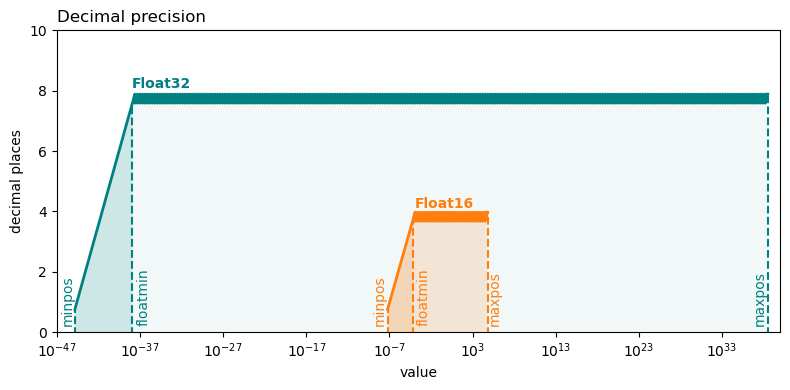

In [113]:
fig,ax = subplots(1,1,figsize=(8,4))

ax.plot(float16s,wcdp_f16,"C1",lw=2)
ax.plot(float32s,wcdp_f32,"teal",lw=2)

for i in [1,3,length(float16s)]
    ax.plot([float16s[i],float16s[i]],[-0.1,wcdp_f16[i]],"C1",ls="--")
end

for i in [1,3,length(float32s)]
    ax.plot([float32s[i],float32s[i]],[-0.1,wcdp_f32[i]],"teal",ls="--")
end
    
ax.fill_between(float16s,-0.1,wcdp_f16,edgecolor="none",facecolor="C1",alpha=0.15)
ax.fill_between(float32s,-0.1,wcdp_f32,edgecolor="none",facecolor="teal",alpha=0.05)
ax.fill_between(float16s[1:3],-0.1,wcdp_f16[1:3],edgecolor="none",facecolor="C1",alpha=0.15)
ax.fill_between(float32s[1:3],-0.1,wcdp_f32[1:3],edgecolor="none",facecolor="teal",alpha=0.15)


x0,x1 = 1e-47,1e40

ax.set_xlim(x0,x1)
ax.set_xscale("log",basex=10)
ax.set_ylim(0,10)

ax.set_xlabel("value")
ax.set_ylabel("decimal places")

ax.text(1e-4,4.1,"Float16",color="C1",fontweight="bold")
ax.text(6e4,0.3,"maxpos",color="C1",rotation=90)
ax.text(2e-4,0.3,"floatmin",color="C1",rotation=90)
ax.text(1e-9,0.3,"minpos",color="C1",rotation=90)

ax.text(1e-38,8.1,"Float32",color="teal",fontweight="bold")
ax.text(6e36,0.3,"maxpos",color="teal",rotation=90)
ax.text(4e-38,0.3,"floatmin",color="teal",rotation=90)
ax.text(3e-47,0.3,"minpos",color="teal",rotation=90)

ax.set_title("Decimal precision",loc="left")

tight_layout()